<a href="https://colab.research.google.com/github/lalidawan/data/blob/master/dp_BFday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset Black Friday**
The original data from https://www.kaggle.com/mehdidag/black-friday/version/1#

# This project, the dataset of customers is selected one product(1129 data) and six columns.
1. Gender Female=1, Male=2
2. Age
    0-17=0,
    18-25=1,
    26=35=2,
    36-45=3,
    46-50=4,
    51-55=5,
    55+=6
3. Occupation
4. City_Category A=0, B=1, C=2
5. Stay_In_Current_City_Years
6. Purchase

In [222]:
from keras.models import Sequential
import requests
import pandas as pd
import numpy as np
import io

url="https://raw.githubusercontent.com/lalidawan/data/master/BlackFridayEdit1.csv"
dataset = requests.get(url, verify=False).content
df = pd.read_csv(io.StringIO(dataset.decode('utf-8')), sep=',')

data=df.values
print(df)

      M  18-25  12  C  4+  13353
0     M  18-25  17  C   1   5396
1     M  18-25   4  C   0  13301
2     M  36-45  14  C   1  10620
3     M  18-25   0  C   3   8297
4     M  18-25   4  B   1   8276
5     M   0-17  10  B   1  10868
6     M  26-35  19  C  4+  10954
7     M  36-45  20  C   1  13610
8     F  18-25   2  A   2  10783
9     M  18-25  20  A  4+  13650
10    F  26-35   0  B   1  10915
11    M  18-25  17  A  4+  10596
12    M  26-35  15  C   2  10782
13    F  26-35   2  C   1  10931
14    M  36-45  17  C   0  13355
15    M  26-35  14  B   3  11012
16    M  26-35  12  B   3   8315
17    M  36-45  20  B   3  13348
18    F  26-35   0  B   1  10617
19    M  26-35   0  C   1   8029
20    M  26-35   7  C  4+  10920
21    M  36-45  17  A   1  13704
22    M  36-45   0  C   3  13279
23    M   0-17  10  C  4+  11020
24    M  51-55  11  C   3   8026
25    M  51-55  13  C   1  13616
26    F   0-17  10  C   2   8207
27    F  26-35  20  C   1   7914
28    M   0-17  10  B   2   8120
29    F  3

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


# Generate input data to array and change some data to digit number

In [218]:
M = 0
F = 0
A = 0
B = 0
C = 0
MT = 0
LT = 0
    
data=[]
for r1, r2, r3, r4, r5, r6 in df.values:
    if r1 == 'M':
      r1 = 0
      M = M + 1
    if r1 == 'F':
      r1 = 1
      F = F + 1
    if r2 == '0-17':
      r2 = 0
    if r2 == '18-25':
      r2 = 1
    if r2 == '26-35':
      r2 = 2
    if r2 == '36-45':
      r2 = 3
    if r2 == '46-50':
      r2 = 4
    if r2 == '51-55':
      r2 = 5
    if r2 == '55+':
      r2 = 6
    if r4 == 'A':
      r4 = 0
      A = A +1
    if r4 == 'B':
      r4 = 1
      B = B + 1
    if r4 == 'C':
      r4 = 2
      C = C + 1
    if r5 == '4+':
      r5 = 4
    if int(r6) < 10000:
      r6 = 0
      LT = LT + 1
    if int(r6) >= 10000:
      r6 = 1
      MT = MT + 1
    data.append([r1,r2,r3,r4,r5,r6])
    
dataset = np.array(data)
print("column, roll")
print(dataset.shape)
print(dataset[:15, :])

column, roll
(1129, 6)
[['0' '1' '17' '2' '1' '0']
 ['0' '1' '4' '2' '0' '1']
 ['0' '3' '14' '2' '1' '1']
 ['0' '1' '0' '2' '3' '0']
 ['0' '1' '4' '1' '1' '0']
 ['0' '0' '10' '1' '1' '1']
 ['0' '2' '19' '2' '4' '1']
 ['0' '3' '20' '2' '1' '1']
 ['1' '1' '2' '0' '2' '1']
 ['0' '1' '20' '0' '4' '1']
 ['1' '2' '0' '1' '1' '1']
 ['0' '1' '17' '0' '4' '1']
 ['0' '2' '15' '2' '2' '1']
 ['1' '2' '2' '2' '1' '1']
 ['0' '3' '17' '2' '0' '1']]


# Visualision to plot some input customer data to be bar graph

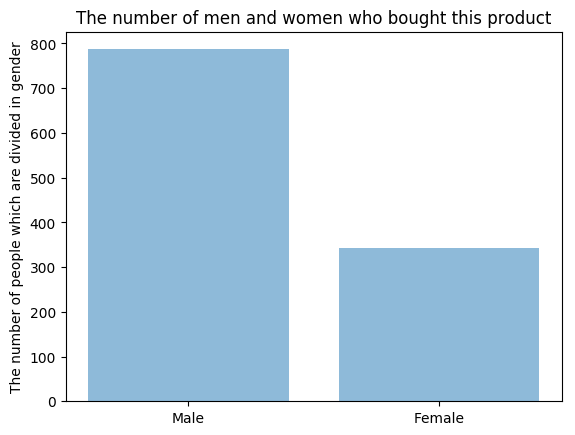

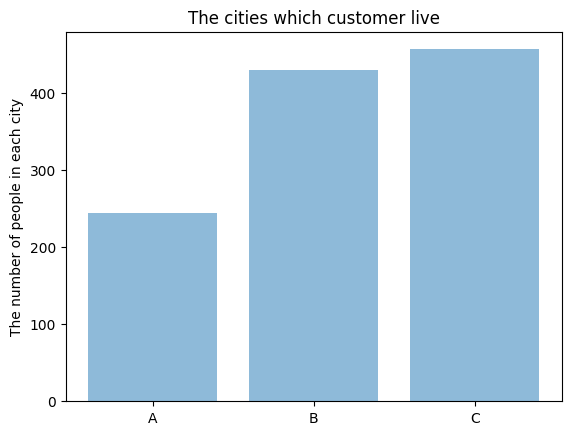

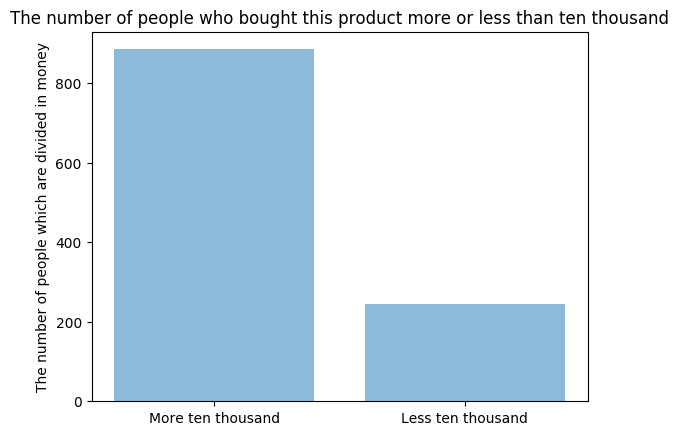

In [219]:
import matplotlib.pyplot as plt; plt.rcdefaults()


people = ('Male', 'Female')
y_pos = np.arange(len(people))
numPeople = [M, F]

plt.bar(y_pos, numPeople, align='center', alpha=0.5)
plt.xticks(y_pos, people)
plt.ylabel('The number of people which are divided in gender')
plt.title('The number of men and women who bought this product')
plt.show()


cities = ('A', 'B', 'C')
y_pos = np.arange(len(cities))
numPeople = [A, B, C]

plt.bar(y_pos, numPeople, align='center', alpha=0.5)
plt.xticks(y_pos, cities)
plt.ylabel('The number of people in each city')
plt.title('The cities which customer live')
plt.show()


money = ('More ten thousand', 'Less ten thousand')
y_pos = np.arange(len(money))
numPeople = [MT, LT]

plt.bar(y_pos, numPeople, align='center', alpha=0.5)
plt.xticks(y_pos, money)
plt.ylabel('The number of people which are divided in money')
plt.title('The number of people who bought this product more or less than ten thousand')
plt.show()

# Spliting custumer data into 3 sets: Train, Validation, and Test

In [187]:
XTRAIN = dataset[:600,0:5]
YTRAIN = dataset[:600,5]
XVALIDATION = dataset[600:900,0:5]
YVALIDATION = dataset[600:900,5]
XTEST = dataset[900:1129,0:5]
YTEST = dataset[900:1129,5]

print(XTRAIN.shape)
print(YTRAIN.shape)
print(XVALIDATION.shape)
print(YVALIDATION.shape)
print(XTEST.shape)
print(YTEST.shape)

(600, 5)
(600,)
(300, 5)
(300,)
(229, 5)
(229,)


# neural network architectures of these data

In [243]:
from keras import layers
from keras.layers import Dense

model = Sequential()
model.add(layers.Dense(72, input_dim=5, activation='relu'))
model.add(layers.Dense(24, activation='relu'))
model.add(layers.Dense(12, activation='relu'))
model.add(layers.Dense(8, activation='softmax'))
model.add(layers.Dense(1, activation='sigmoid'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_130 (Dense)            (None, 72)                432       
_________________________________________________________________
dense_131 (Dense)            (None, 24)                1752      
_________________________________________________________________
dense_132 (Dense)            (None, 12)                300       
_________________________________________________________________
dense_133 (Dense)            (None, 8)                 104       
_________________________________________________________________
dense_134 (Dense)            (None, 1)                 9         
Total params: 2,597
Trainable params: 2,597
Non-trainable params: 0
_________________________________________________________________
None


# Document the training time between training time, epochs, dataset size of custumers on black friday in one product.

In [244]:
from keras.optimizers import RMSprop
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(XTRAIN, YTRAIN, epochs=600, batch_size=10, validation_data=(XVALIDATION, YVALIDATION))

Train on 600 samples, validate on 300 samples
Epoch 1/600
600/600 [==============================] - 3s 5ms/step - loss: 0.7147 - acc: 0.4617 - val_loss: 0.6673 - val_acc: 0.6867
Epoch 2/600
600/600 [==============================] - 0s 214us/step - loss: 0.6471 - acc: 0.7667 - val_loss: 0.6291 - val_acc: 0.7900
Epoch 3/600
600/600 [==============================] - 0s 210us/step - loss: 0.6228 - acc: 0.7733 - val_loss: 0.6073 - val_acc: 0.7900
Epoch 4/600
600/600 [==============================] - 0s 217us/step - loss: 0.6044 - acc: 0.7733 - val_loss: 0.5885 - val_acc: 0.7900
Epoch 5/600
600/600 [==============================] - 0s 209us/step - loss: 0.5874 - acc: 0.7733 - val_loss: 0.5597 - val_acc: 0.7900
Epoch 6/600
600/600 [==============================] - 0s 245us/step - loss: 0.5625 - acc: 0.7733 - val_loss: 0.5453 - val_acc: 0.7900
Epoch 7/600
600/600 [==============================] - 0s 216us/step - loss: 0.5545 - acc: 0.7733 - val_loss: 0.5380 - val_acc: 0.7900
Epoch 8/600

# studying learning curves by plots of epoch vs loss on training / validation datasets

In [245]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

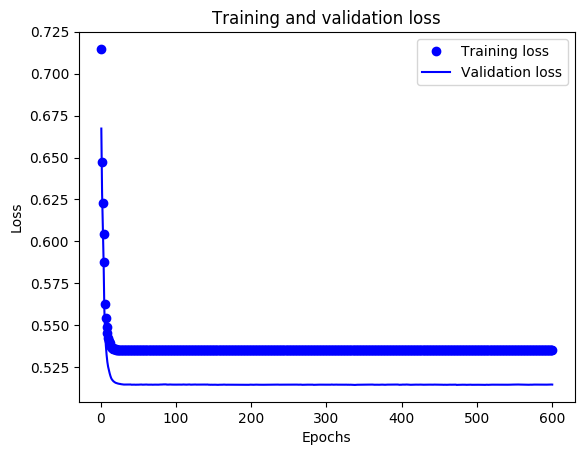

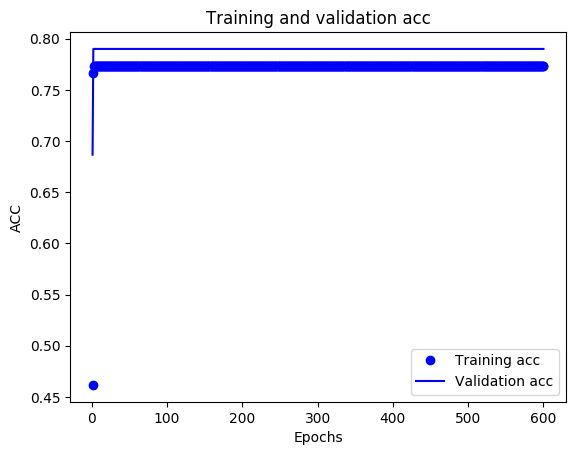

In [246]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training acc')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('ACC')
plt.legend()
plt.show()

# Evaluatiton the results of predictability of the customer in the amount of money is spent in one product

In [253]:
results = model.evaluate(XTRAIN, YTRAIN)
print(results)
print("\n%s: %.2f%%" % (model.metrics_names[1], results[1]*100))


600/600 [==============================] - 0s 50us/step
[0.5352207358678182, 0.7733333325386047]

acc: 77.33%


In [254]:
results = model.evaluate(XVALIDATION, YVALIDATION)
print(results)
print("\n%s: %.2f%%" % (model.metrics_names[1], results[1]*100))

300/300 [==============================] - 0s 75us/step
[0.5146605364481608, 0.7899999992052714]

acc: 79.00%


In [255]:
results = model.evaluate(XTEST, YTEST)
print(results)
print("\n%s: %.2f%%" % (model.metrics_names[1], results[1]*100))

229/229 [==============================] - 0s 78us/step
[0.49801475004858325, 0.8034934497816594]

acc: 80.35%


In [250]:
model.predict(XTRAIN[0:20])

array([[0.77445066],
       [0.77445066],
       [0.77445066],
       [0.77445066],
       [0.77445066],
       [0.77445066],
       [0.77445066],
       [0.77445066],
       [0.77445066],
       [0.77445066],
       [0.77445066],
       [0.77445066],
       [0.77445066],
       [0.77445066],
       [0.77445066],
       [0.77445066],
       [0.77445066],
       [0.77445066],
       [0.77445066],
       [0.77445066]], dtype=float32)

In [251]:
model.predict(XVALIDATION[0:20])

array([[0.77445066],
       [0.77445066],
       [0.77445066],
       [0.77445066],
       [0.77445066],
       [0.77445066],
       [0.77445066],
       [0.77445066],
       [0.77445066],
       [0.77445066],
       [0.77445066],
       [0.77445066],
       [0.77445066],
       [0.77445066],
       [0.77445066],
       [0.77445066],
       [0.77445066],
       [0.77445066],
       [0.77445066],
       [0.77445066]], dtype=float32)

In [252]:
model.predict(XTEST[0:20])

array([[0.77445066],
       [0.77445066],
       [0.77445066],
       [0.77445066],
       [0.77445066],
       [0.77445066],
       [0.77445066],
       [0.77445066],
       [0.77445066],
       [0.77445066],
       [0.77445066],
       [0.77445066],
       [0.77445066],
       [0.77445066],
       [0.77445066],
       [0.77445066],
       [0.77445066],
       [0.77445066],
       [0.77445066],
       [0.77445066]], dtype=float32)